# Data Wrangling Project: WeRateDogs

## Gathering data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
#This code is to import the data from twitter using the API

#import tweepy

#consumer_key = ' '
#consumer_secret = ' '
#access_token = ' '
#access_secret = ' '

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [3]:
import requests

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#taking the document from the web and creating a new file with the content inside
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [4]:
df =  pd.read_csv('twitter-archive-enhanced.csv')
df_img = pd.read_csv('image-predictions.tsv',sep='\t')

In [5]:
#List of tweet ids to be used in the API
list_tweet_id = list(df.tweet_id.values)

In [2]:
#Getting tweets as JSON and write them down into a file called tweet_json.txt, which has been created already
#import json 

#fails_id=dict()
#with open('tweet_json.txt','w') as json_wfile:
#    for tweet_id in list_tweet_id:
#        id_string = str(tweet_id)
#        try:
#            tweet = api.get_status(id_string, tweet_mode='extended')
#            json.dump(tweet._json, json_wfile, ensure_ascii=False)
#            json_wfile.write('\n')
#        except tweepy.TweepError as e:
#            fails_id[id_string] = e
#            pass

In [6]:
with open('tweet_json.txt','r') as json_rfile:
    jfile = json_rfile.read()

In [7]:
ljfile = jfile.split('\n')
len(ljfile)

#There is an empty line in between to be removed or not to be considered
for i in ljfile:
    if len(i) < 10:
        print(i)

#Checking how the entries are organized
ljfile[0]

In [8]:
import re

jf_list = []
for line in ljfile: 
    if len(line) > 1:
        user_id = str(re.findall(r'"id": [0-9]+',line)[0].split(': ')[1])
        parse_text = re.findall(r'"full_text": .+. "truncated":',line)[0]
        rate = re.findall(r'\d+/\d+',parse_text)[0]           
        link = 'https://twitter.com/dog_rates/status/'+user_id
        rts = int(re.findall(r'"retweet_count": [0-9]+',line)[0].split(': ')[1])
        likes = int(re.findall(r'"favorite_count": [0-9]+',line)[0].split(': ')[1])        
    else:
        continue

        
    jf_dict = { 'tweet_id' : user_id, 
               'rate': rate, 
               'tweet_link' : link, 
               'retweet_count': rts, 
               'favorite_count': likes}         
    jf_list.append(jf_dict)

In [9]:
len(jf_list)

2342

In [10]:
df_json = pd.DataFrame(jf_list)

## Assessing data

## df table

In [11]:
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
#not useful information
df.source.values

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       ...,
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'], dtype=object)

In [14]:
#Checking for duplicated entries 
len(df[df.tweet_id.duplicated()])

0

In [15]:
df.name.value_counts()[:15]

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Lola        10
Penny       10
Tucker      10
Bo           9
Winston      9
the          8
Sadie        8
an           7
Daisy        7
Name: name, dtype: int64

In [16]:
len(df)

2356

### Quality issues

1 - the columns 'doggo', 'floofer', 'pupper', 'puppo' are better described as observations of a single column stage_of_dog.

2 - **missing values** as **None** instead of **NaN** in columns 'doggo', 'floofer', 'pupper', 'puppo'.

3 - the new column stage_of_dog is a **categorical** instead of object dtype.

4 - in the name column there are 'None', 'a', 'the' and 'an' names, which seem either NaN or wrong information.

5 - **wrong or inconsistent dtypes** also for the columns: tweet_id, timestamp. The tweet_id is an integer in both df and df_img but an object type in df_json.

6 - the dog rating in the df table (i.e. 'rating_numerator' and 'rating_denominator') is **represented differently** from the df_json table (i.e. 'rate').

7 - **columns named differently across tables:** 'expanded_url' in the df table, and 'tweet_link' in the df_json table.

8 - the column 'sources' has the same value for all entries and **does not offer any insights** about the dogs ranking.

11 - **missing values 'NaN':** There are 2356 entries in total, but less than 2356 values in the following columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'.

12 - **missing names** in df.name but that are present in the df.text.

13 - Some of the observations are **retweets** (start with RT) in the df.text column.

14 - The df_img table has less rows than the other tables indicating that not all tweet_ids have pictures.

### Tidiness issues 

1 - the columns 'doggo', 'floofer', 'pupper', 'puppo' are better described as values of a single column (the various stages of a dog) with a categorical dtype. This means that we have observations in place of variables.

9 - for the tweet id = 886736880519319552 in the df table there are **two observations in the column** expanded_urls.

10 - the df table and df_json both **form a single type of observational unit**, which is associated to the tweets description. 

# df_img table

In [17]:
df_img.tail(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [18]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
#Checking for duplicated entries 
len(df_img[df_img.tweet_id.duplicated()])

0

In [20]:
df_img_id = df_img[['jpg_url','tweet_id']]
df_img_id.head(1)

,jpg_url,tweet_id
0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,666020888022790149


In [21]:
len(df_img)

2075

# df_json table

In [22]:
df_json.head(3)

,favorite_count,rate,retweet_count,tweet_id,tweet_link
0,38178,13/10,8357,892420643555336193,https://twitter.com/dog_rates/status/892420643...
1,32741,13/10,6174,892177421306343426,https://twitter.com/dog_rates/status/892177421...
2,24653,12/10,4085,891815181378084864,https://twitter.com/dog_rates/status/891815181...


In [23]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 5 columns):
favorite_count    2342 non-null int64
rate              2342 non-null object
retweet_count     2342 non-null int64
tweet_id          2342 non-null object
tweet_link        2342 non-null object
dtypes: int64(2), object(3)
memory usage: 91.6+ KB


In [24]:
#Checking for duplicated entries 
len(df_json[df_json.tweet_id.duplicated()])

0

In [25]:
len(df_json)

2342

## Cleaning data

In [26]:
#Making a copy of the datasets before cleaning
dfc = df.copy()
dfc_json = df_json.copy()
dfc_img = df_img.copy()

### Cleaning task 1

- the columns 'doggo', 'floofer', 'pupper', 'puppo' are better described as values of a single column (the various stages of a dog) with a **categorical** dtype. This means that we have observations in place of variables. 
- **Create** a new column 'stages_of_dog' and add all the information from 'doggo', 'floofer', 'pupper', 'puppo' as an observation in this new column.

In [27]:
add_stages=dict()
for line,i in zip(dfc.text.values,dfc.text.index):
    s=str(line)
    try:
        category1 = re.findall(r'doggo',s)
        category2 = re.findall(r'floofer',s)
        category3 = re.findall(r'pupper',s)
        category4 = re.findall(r'puppo',s)
        if len(category4)>0:
            add_stages[i]=category4[0].split(' ')[0]
            dfc.loc[i,'stages_of_dog']=category4[0].strip()
        elif len(category3)>0:
            add_stages[i]=category3[0].split(' ')[0]
            dfc.loc[i,'stages_of_dog']=category3[0].strip()
        elif len(category2)>0:
            add_stages[i]=category2[0].split(' ')[0]
            dfc.loc[i,'stages_of_dog']=category2[0].strip()
        elif len(category1)>0:
            add_stages[i]=category1[0].split(' ')[0]
            dfc.loc[i,'stages_of_dog']=category1[0].strip()
        else:
            dfc.loc[i,'stages_of_dog']='NaN'
            continue
    except ValueError:
        print('No name found.')

In [28]:
len(add_stages)

399

In [29]:
dfc.stages_of_dog.value_counts()

NaN        1957
pupper      272
doggo        86
puppo        37
floofer       4
Name: stages_of_dog, dtype: int64

- **Check** whether these values match with the present variables 'doggo','pupper','puppo' and 'floofer'.

In [30]:
dfc.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [31]:
#The number of observations in the column doggo that is really doggo and not another stage ('pupper','puppo' and 'floofer')
(dfc[dfc.doggo=='doggo'].stages_of_dog=='doggo').sum()

76

This means that from 97 observations on **doggo** only 76 are correct, and match with the actual variable. 

In [32]:
dfc.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [33]:
(dfc[dfc.puppo=='puppo'].stages_of_dog=='puppo').sum()

29

This means that 1 observation for the **puppo** variable is wrong.

In [34]:
dfc.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [35]:
(dfc[dfc.pupper=='pupper'].stages_of_dog=='pupper').sum()

248

9 observations for the **pupper** variable are wrong.

In [36]:
dfc.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [37]:
(dfc[dfc.floofer=='floofer'].stages_of_dog=='floofer').sum()

4

6 observations for the **floofer** variable are wrong.

- Because of these incorrect values, I will exclude the present columns and use the one I created above on 'stages_of_dogs'.

In [38]:
del dfc['doggo']
del dfc['pupper']
del dfc['puppo']
del dfc['floofer']

In [39]:
dfc.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


### Cleaning task 2

- naming missing values as **None** instead of **NaN** in columns 'doggo', 'floofer', 'pupper', 'puppo'. 
- **Replace** empty values by 'NaN'.
- Solved in **cleaning task 1**.

In [40]:
dfc.stages_of_dog.value_counts()

NaN        1957
pupper      272
doggo        86
puppo        37
floofer       4
Name: stages_of_dog, dtype: int64

### Cleaning task 3

- the new column stage_of_dog is a **categorical** instead of **object** dtype.
- **Change** the observation type from object to category.

In [41]:
#Changing the dtype of the column stages_of_dog
dfc['stages_of_dog'] = dfc['stages_of_dog'].astype('category')

In [42]:
dfc.stages_of_dog.value_counts()

NaN        1957
pupper      272
doggo        86
puppo        37
floofer       4
Name: stages_of_dog, dtype: int64

### Cleaning task 4

- in the **name** column there are **'None'**, **'a'**, **'the'** and **'an'** names, which seem either NaN or wrong information. 
- **Replace** these by 'NaN'.

In [43]:
dfc.name.replace(to_replace=['None','a','an','the'], value='NaN', inplace=True)

In [44]:
dfc.name.value_counts()[:10]

NaN        815
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
Name: name, dtype: int64

- **Find** if there are any other lowercase names that may indicate an invalid name, and then **replace** them by 'NaN'.

In [45]:
invalid_names=[]
for name in dfc[dfc.name!='NaN'].name:
    lowercase = re.findall(r'^[a-z]+',name)
    if lowercase:
        invalid_names.append(name)

In [46]:
len(invalid_names)

39

In [47]:
np.array(invalid_names)

array(['such', 'quite', 'quite', 'quite', 'not', 'one', 'incredibly',
       'mad', 'very', 'very', 'just', 'my', 'one', 'not', 'his', 'one',
       'very', 'actually', 'just', 'getting', 'mad', 'very', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'very', 'getting',
       'just', 'actually', 'by', 'officially', 'life', 'one', 'light',
       'just', 'space', 'quite'], 
      dtype='<U12')

- There are at least **39 invalid names**.

In [48]:
dfc.name.replace(to_replace=invalid_names, value='NaN', inplace=True)

### Cleaning task 5

- **wrong or inconsistent dtypes** also for the columns: tweet_id, timestamp. The tweet_id is an integer in both df and df_img but an object type in df_json.

- **Change** the timestamp dtype in the dfc table from object to datetime.

In [49]:
dfc['timestamp']=pd.to_datetime(dfc['timestamp'])
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stages_of_dog                 2356 non-null category
dtypes: category(1), datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 241.9+ KB


- **Change** the tweet_id dtype in the dfc_json table from object to integer.

In [50]:
dfc_json['tweet_id'] = dfc_json['tweet_id'].astype('int64')
dfc_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 5 columns):
favorite_count    2342 non-null int64
rate              2342 non-null object
retweet_count     2342 non-null int64
tweet_id          2342 non-null int64
tweet_link        2342 non-null object
dtypes: int64(3), object(2)
memory usage: 91.6+ KB


### Cleaning task 6

-  the dog rating in the df table (i.e. 'rating_numerator' and 'rating_denominator') is represented differently from the df_json table (i.e. 'rate').
- **Split** the rate column in the dfc_json table and **modify** its observation dtype from object to integer.

In [51]:
dfc_json['rating_numerator'], dfc_json['rating_denominator'] = dfc_json['rate'].str.split('/', 1).str
dfc_json['rating_numerator'] = dfc_json['rating_numerator'].astype('int64')
dfc_json['rating_denominator'] = dfc_json['rating_denominator'].astype('int64')
dfc_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 7 columns):
favorite_count        2342 non-null int64
rate                  2342 non-null object
retweet_count         2342 non-null int64
tweet_id              2342 non-null int64
tweet_link            2342 non-null object
rating_numerator      2342 non-null int64
rating_denominator    2342 non-null int64
dtypes: int64(5), object(2)
memory usage: 128.2+ KB


In [52]:
#Removing double information about the same variable(s)
del dfc_json['rate']

In [53]:
dfc_json.head(1)

,favorite_count,retweet_count,tweet_id,tweet_link,rating_numerator,rating_denominator
0,38178,8357,892420643555336193,https://twitter.com/dog_rates/status/892420643...,13,10


### Cleaning task 7

- **columns named differently across tables:** 'expanded_url' in the df table, and 'tweet_link' in the df_json table. 
- **Rename** the column in the dfc table.

In [54]:
dfc = dfc.rename(index=str, columns={"expanded_urls": "tweet_link"})

In [55]:
dfc.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,tweet_link,rating_numerator,rating_denominator,name,stages_of_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


### Cleaning task 8

- the column 'sources' has the same value for all entries and does not offer any insight about the dogs ranking.
- **Remove** the column.

In [56]:
del dfc['source']

In [57]:
dfc.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,tweet_link,rating_numerator,rating_denominator,name,stages_of_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


### Cleaning task 9

- for the **tweet id** = 886736880519319552 in the dfc table there are two observations in the old column expanded_urls (now called tweet_link).
- **Check** if there are other untidy observations.

In [58]:
#Finding the urls that do not match with the scheme https://twitter.com/dog_rates/status/ + tweet_id
index_dict=dict()
index_=0
for link in dfc.tweet_link:
    try:
        url_ = re.findall(r'^https://twitter.com/dog_rates/status/[0-9]+',link)
        if len(url_) == 0 or len(url_) > 1:
            index_dict[index_]=link
            #print(index_,link)
        index_+=1
    except TypeError:
        index_dict[index_]=link
        #print(index_,link)
len(index_dict)

248

- There are **248 observations** that do not follow the (https://twitter.com/dog_rates/status/ + tweet_id) scheme.
- **Replace** these untidy observations using the url scheme cited above.

In [59]:
dfc['tweet_link'] = 'https://twitter.com/dog_rates/status/'
dfc['tweet_id_str'] = dfc['tweet_id']
dfc['tweet_id_str'] = dfc['tweet_id_str'].astype(str)
dfc['tweet_link'] = dfc['tweet_link'] + dfc['tweet_id_str']

In [60]:
del dfc['tweet_id_str']

In [61]:
dfc.tweet_link[0:10]

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
3    https://twitter.com/dog_rates/status/891689557...
4    https://twitter.com/dog_rates/status/891327558...
5    https://twitter.com/dog_rates/status/891087950...
6    https://twitter.com/dog_rates/status/890971913...
7    https://twitter.com/dog_rates/status/890729181...
8    https://twitter.com/dog_rates/status/890609185...
9    https://twitter.com/dog_rates/status/890240255...
Name: tweet_link, dtype: object

### Cleaning task 10

- the dfc table and dfc_json both form a single type of observational unit, which is associated to the tweets description.
- **Create** a new DataFrame, dfc_merge, by merging the information of both dfc and dfc_json tables.

In [62]:
dfc_merge = dfc.merge(dfc_json, how='inner', on=['tweet_id','tweet_link','rating_numerator','rating_denominator'],\
                      left_on=None, right_on=None, left_index=False, right_index=False)

In [63]:
len(dfc),len(dfc_json),len(dfc_merge)

(2356, 2342, 2342)

In [64]:
dfc_merge.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,tweet_link,rating_numerator,rating_denominator,name,stages_of_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,38178,8357
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,32741,6174
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,24653,4085


### Cleaning task 11

- **missing values 'NaN':** There are 2356 entries in total, but less than 2356 values in the following **columns** 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'. 
- The column 'expanded_urls' was fixed in **cleaning task 9**.
- **Check** the proportion of non-null observations in 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'.

In [65]:
dfc_merge.in_reply_to_status_id.count()/len(dfc_merge.in_reply_to_status_id)

0.033304867634500426

In [66]:
dfc_merge.in_reply_to_user_id.count()/len(dfc_merge.in_reply_to_user_id)

0.033304867634500426

In [67]:
dfc_merge.retweeted_status_id.count()/len(dfc_merge.retweeted_status_id)

0.071733561058923992

In [68]:
dfc_merge.retweeted_status_user_id.count()/len(dfc_merge.retweeted_status_user_id)

0.071733561058923992

In [69]:
dfc_merge.retweeted_status_timestamp.count()/len(dfc_merge.retweeted_status_timestamp)

0.071733561058923992

- For each of the columns/variables ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'), the observations we have are less than 10% of the data. In other words, **more than 90% of the data for these variables are missing** and any conclusions taken based on these numbers may be misleading. Therefore, I chose to exclude these variables.

In [70]:
for i in ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id'\
          , 'retweeted_status_user_id', 'retweeted_status_timestamp']:
    del dfc_merge[i]

In [71]:
dfc_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2341
Data columns (total 10 columns):
tweet_id              2342 non-null int64
timestamp             2342 non-null datetime64[ns]
text                  2342 non-null object
tweet_link            2342 non-null object
rating_numerator      2342 non-null int64
rating_denominator    2342 non-null int64
name                  2342 non-null object
stages_of_dog         2342 non-null category
favorite_count        2342 non-null int64
retweet_count         2342 non-null int64
dtypes: category(1), datetime64[ns](1), int64(5), object(3)
memory usage: 185.5+ KB


### Cleaning task 12

- **missing names** in df.names but that are present in the df.text.

- **Check** which names have been set to 'NaN' in dfc_merge.name, but there is data about them in dfc_merge.text.
- **Add** the new names found.

In [72]:
#Count of names before adding new data 
count_names_before = dfc_merge[dfc_merge.name!='NaN'].name.count()
count_names_before

1496

In [73]:
strings_ = dfc_merge[dfc_merge.name == 'NaN'].text

In [74]:
str_indexes_ = dfc_merge[dfc_merge.name == 'NaN'].text.index

In [75]:
add_names=dict()
for str_index,string in zip(str_indexes_,strings_):
    try:
        name = re.findall(r'\sis\s[A-Z]\w+',string)
        name2 = re.findall(r'\snamed\s[A-Z]\w+',string)
        if len(name)>0:
            add_names[str_index]=name[0].strip().split(' ')[1]
            dfc_merge.loc[str_index,'name']=name[0].strip().split(' ')[1]
        elif len(name2)>0:
            add_names[str_index]=name2[0].strip().split(' ')[1]
            dfc_merge.at[str_index,'name']=name2[0].strip().split(' ')[1]
        else:
            continue#print(string)
    except ValueError:
        print('No name found.')

In [76]:
add_names

{34: 'Howard',
 162: 'Zoey',
 198: 'Blue',
 340: 'Blue',
 592: 'Tickles',
 830: 'Charley',
 839: 'Zoey',
 978: 'Quizno',
 1054: 'Bretagne',
 1664: 'Thea',
 1720: 'Sabertooth',
 1828: 'Yoshi',
 1839: 'Wylie',
 1941: 'Kip',
 2020: 'Jacob',
 2052: 'Rufus',
 2102: 'Spork',
 2111: 'Cherokee',
 2114: 'Hemry',
 2132: 'Alphred',
 2147: 'Alfredo',
 2152: 'Zeus',
 2177: 'Leroi',
 2190: 'Berta',
 2204: 'Chuk',
 2213: 'Guss',
 2221: 'Alfonso',
 2223: 'Oliver',
 2235: 'Cheryl',
 2241: 'Jessiga',
 2250: 'Klint',
 2253: 'Big',
 2255: 'Tickles',
 2259: 'Kohl',
 2273: 'Daryl',
 2290: 'Pepe',
 2297: 'Octaviath',
 2300: 'Johm'}

In [77]:
#Count of names AFTER adding new data 
count_names_after = dfc_merge[dfc_merge.name!='NaN'].name.count()
count_names_after

1534

In [78]:
count_names_after - count_names_before == len(add_names)

True

### Cleaning task 13

- Some of the observations are **retweets** (start with RT) in the df.text column.
- **Check** for RT (retweets) in the dfc_merge.text and then **create** the is_retweet variable.

In [79]:
for line_index,line in zip(dfc_merge.text.index,dfc_merge.text):
    try:
        is_RT = re.findall(r'^RT',line)
        if len(is_RT)>0:
            dfc_merge.loc[line_index,'is_retweet']=True
            #print(line_index,line)
        else:
            dfc_merge.loc[line_index,'is_retweet']=False
    except ValueError:
        print('No retweet') 

In [80]:
dfc_merge.is_retweet.value_counts()

False    2172
True      170
Name: is_retweet, dtype: int64

In [81]:
dfc_merge.head(2)

,tweet_id,timestamp,text,tweet_link,rating_numerator,rating_denominator,name,stages_of_dog,favorite_count,retweet_count,is_retweet
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,38178,8357,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,32741,6174,False


- **Check** for tweets that are comments.

In [82]:
for line_index,line in zip(dfc_merge.text.index,dfc_merge.text):
    try:
        is_comment = re.findall(r'^@',line)
        if len(is_comment)>0:
            dfc_merge.loc[line_index,'is_comment']=True
            #print(line_index,line)
        else:
            dfc_merge.loc[line_index,'is_comment']=False
    except ValueError:
        print('No retweet') 

In [83]:
dfc_merge.is_comment.value_counts()

False    2319
True       23
Name: is_comment, dtype: int64

- **Create** a new DataFrame where the observations are neither retweets nor comments.

In [84]:
d1 = dfc_merge[dfc_merge.is_retweet == False]

In [85]:
dfc_new = d1[d1.is_comment==False]

In [86]:
dfc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 2341
Data columns (total 12 columns):
tweet_id              2149 non-null int64
timestamp             2149 non-null datetime64[ns]
text                  2149 non-null object
tweet_link            2149 non-null object
rating_numerator      2149 non-null int64
rating_denominator    2149 non-null int64
name                  2149 non-null object
stages_of_dog         2149 non-null category
favorite_count        2149 non-null int64
retweet_count         2149 non-null int64
is_retweet            2149 non-null object
is_comment            2149 non-null object
dtypes: category(1), datetime64[ns](1), int64(5), object(5)
memory usage: 203.8+ KB


In [87]:
dfc_new.head(3)

,tweet_id,timestamp,text,tweet_link,rating_numerator,rating_denominator,name,stages_of_dog,favorite_count,retweet_count,is_retweet,is_comment
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,38178,8357,False,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,32741,6174,False,False
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,24653,4085,False,False


### Cleaning task 14

- The df_img table has less rows than the other tables indicating that not all tweet_ids have pictures.
- **Select** only the tweet_ids in the dfc_new table that have a picture associated with them.
- **Create** the master DataFrame.

In [88]:
dfc_img_id = dfc_img[['jpg_url','tweet_id']]
dfc_img_id.head(3)

,jpg_url,tweet_id
0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,666020888022790149
1,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,666029285002620928
2,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,666033412701032449


In [89]:
master_df = dfc_new.merge(dfc_img_id, how='inner', on=['tweet_id'],\
                      left_on=None, right_on=None, left_index=False, right_index=False)

In [90]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 13 columns):
tweet_id              1992 non-null int64
timestamp             1992 non-null datetime64[ns]
text                  1992 non-null object
tweet_link            1992 non-null object
rating_numerator      1992 non-null int64
rating_denominator    1992 non-null int64
name                  1992 non-null object
stages_of_dog         1992 non-null category
favorite_count        1992 non-null int64
retweet_count         1992 non-null int64
is_retweet            1992 non-null object
is_comment            1992 non-null object
jpg_url               1992 non-null object
dtypes: category(1), datetime64[ns](1), int64(5), object(6)
memory usage: 204.5+ KB


In [91]:
master_df.is_retweet.sum(),master_df.is_comment.sum()

(0, 0)

In [92]:
del master_df['is_retweet']
del master_df['is_comment']

In [93]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 11 columns):
tweet_id              1992 non-null int64
timestamp             1992 non-null datetime64[ns]
text                  1992 non-null object
tweet_link            1992 non-null object
rating_numerator      1992 non-null int64
rating_denominator    1992 non-null int64
name                  1992 non-null object
stages_of_dog         1992 non-null category
favorite_count        1992 non-null int64
retweet_count         1992 non-null int64
jpg_url               1992 non-null object
dtypes: category(1), datetime64[ns](1), int64(5), object(4)
memory usage: 173.3+ KB


In [94]:
rating = master_df.rating_numerator/master_df.rating_denominator

In [95]:
master_df.rating_numerator.value_counts()[:10]

12    449
10    418
11    396
13    261
9     151
8      95
7      52
14     35
5      33
6      32
Name: rating_numerator, dtype: int64

In [96]:
master_df.rating_denominator.value_counts()[:10]

10     1974
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
Name: rating_denominator, dtype: int64

## Storing data

In [97]:
#Creating a csv file to store the data
master_df.to_csv('twitter_archive_master.csv',index=False)

## Data visualization & Insights

### Plot 1

- Visualizing the relation between the retweet counts and the favorite counts.

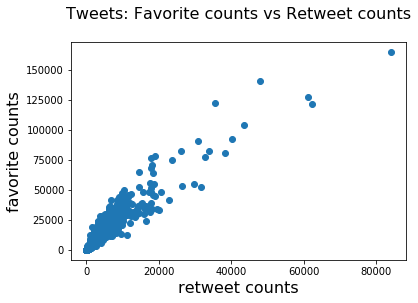

In [98]:
plt.title('Tweets: Favorite counts vs Retweet counts\n', fontsize=16)
plt.scatter(x=master_df.retweet_count,y=master_df.favorite_count)
plt.ylabel('favorite counts', fontsize=16)
plt.xlabel('retweet counts', fontsize=16)
plt.savefig('plot1a.png',bbox_inches='tight')

It seems that there is a positive linear correlation between favorite counts and retweet counts. 

- Finding the linear regression:

In [99]:
xi = master_df.retweet_count
y = master_df.favorite_count 

In [100]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

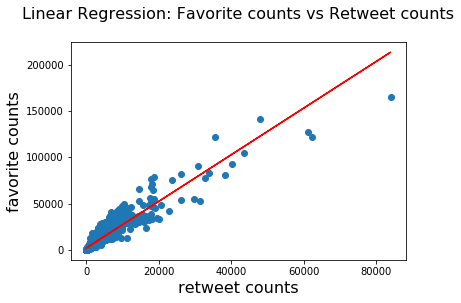

In [101]:
plt.title('Linear Regression: Favorite counts vs Retweet counts\n', fontsize=16)
plt.plot(xi,y,'o', xi, line,'red')
plt.ylabel('favorite counts', fontsize=16)
plt.xlabel('retweet counts', fontsize=16)
plt.savefig('plot1b.png',bbox_inches='tight')

In [120]:
slope, intercept

(2.5152394570460168, 2060.0612754865542)

In [102]:
r_value

0.92970824537691543

Indeed, there is a positive strong correlation since the $r\_value$ is closer to +1. We can predict the favorite counts based on the retweet counts, e.g. **tweets** *highly retweeted* will most likely be also *highly favorited*.

source helping with the linearfit plot: https://plot.ly/matplotlib/linear-fits/

### Plot 2

- Histogram for the stages of dogs. (not considering NaN)

In [103]:
master_df[master_df.stages_of_dog!='NaN'].stages_of_dog.value_counts()

pupper     229
doggo       66
puppo       28
floofer      3
NaN          0
Name: stages_of_dog, dtype: int64

In [104]:
#Number of observations with data about the stages of dog
n_stages_classified = master_df[master_df.stages_of_dog!='NaN'].stages_of_dog.count()

In [105]:
#proportion for each category
prop_pupper = master_df[master_df.stages_of_dog!='NaN'].stages_of_dog.value_counts()['pupper']/n_stages_classified
prop_doggo = master_df[master_df.stages_of_dog!='NaN'].stages_of_dog.value_counts()['doggo']/n_stages_classified
prop_floofer = master_df[master_df.stages_of_dog!='NaN'].stages_of_dog.value_counts()['floofer']/n_stages_classified
prop_puppo = master_df[master_df.stages_of_dog!='NaN'].stages_of_dog.value_counts()['puppo']/n_stages_classified

In [106]:
prop_pupper,prop_doggo,prop_puppo,prop_floofer

(0.7024539877300614,
 0.20245398773006135,
 0.085889570552147243,
 0.009202453987730062)

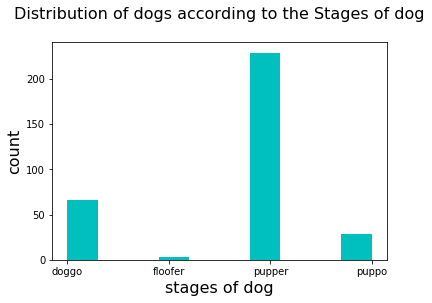

In [107]:
plt.title('Distribution of dogs according to the Stages of dog\n', fontsize=16)
plt.hist(master_df[master_df.stages_of_dog!='NaN'].stages_of_dog.values,color=['c'])
plt.ylabel('count', fontsize=16)
plt.xlabel('stages of dog', fontsize=16)
plt.savefig('plot2.png',bbox_inches='tight')

For the dogs classified according to the various **stages of dog**, 70% are described as **pupper**. Following the **dogtionary**, this means that 70% of the classified dogs are younger (small doggos), inexperienced or unprepared for the responsibilities of a doggo. **Doggos** (older dogs) are 20% of the classified dogs, and the **dogs transitioning (puppo)** between pupper and doggo are 8%. **Floofer**, dogs with excess fur, are less than 1%.

### Plot 3

- The **10** most frequent names.

In [108]:
top10_names = master_df[master_df.name!='NaN'].name.value_counts()[:10]
list(top10_names.values)

[11, 10, 10, 10, 9, 9, 8, 8, 7, 7]

In [109]:
list(top10_names.index)

['Oliver',
 'Lucy',
 'Charlie',
 'Cooper',
 'Penny',
 'Tucker',
 'Winston',
 'Sadie',
 'Daisy',
 'Toby']

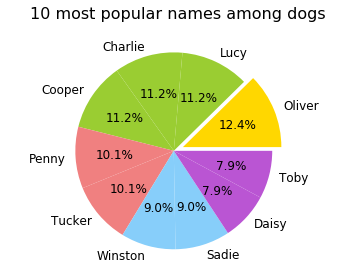

In [110]:
plt.title('10 most popular names among dogs\n', fontsize=16)
color_list=['gold', 'yellowgreen','yellowgreen','yellowgreen','lightcoral','lightcoral',\
            'lightskyblue','lightskyblue','mediumorchid','mediumorchid']
plt.pie(list(top10_names.values),labels=list(top10_names.index),autopct='%1.1f%%',\
        colors=color_list,explode = (0.1,0,0,0,0,0,0,0,0,0), textprops={'fontsize': 12})
plt.axis('equal')

plt.savefig('plot3.png',bbox_inches='tight')

### Plot 4

- How many dogs have the rating_numerator smaller than or equal to the rating_denominator.

In [111]:
#Number of ratings equal to 1
r_equal1 = (master_df.rating_numerator/master_df.rating_denominator == 1).sum()
r_equal1

420

In [112]:
#Number of ratings less than 1
r_below1 = (master_df.rating_numerator/master_df.rating_denominator < 1).sum()
r_below1

415

In [113]:
#Number of ratings less than 1
r_below_equal1 = (master_df.rating_numerator/master_df.rating_denominator <= 1).sum()
r_below_equal1

835

For $rating\_numerator \leq rating\_denominator$, there are **835** dogs.

In [114]:
dogs_rbe1 = master_df[master_df.rating_numerator/master_df.rating_denominator <= 1]

- Plot the retweet x favorite counts for these dogs

In [115]:
x_ = dogs_rbe1.retweet_count.values
y_ = dogs_rbe1.favorite_count.values


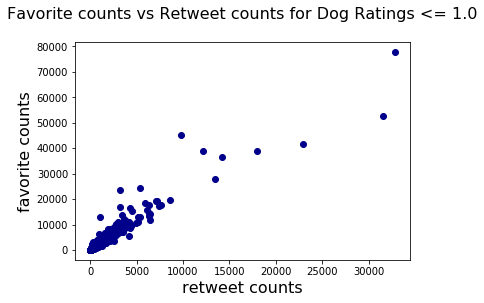

In [116]:
plt.title('Favorite counts vs Retweet counts for Dog Ratings <= 1.0\n', fontsize=16)
plt.scatter(x_,y_,color='darkblue')
plt.ylabel('favorite counts', fontsize=16)
plt.xlabel('retweet counts', fontsize=16)
plt.savefig('plot4a.png',bbox_inches='tight')

- Compare with the dogs that have $rating\_numerator > rating\_denominator$

In [117]:
#Number of ratings greater than 1
r_above1 = (master_df.rating_numerator/master_df.rating_denominator > 1).sum()
dogs_rabove1 = master_df[master_df.rating_numerator/master_df.rating_denominator > 1]

In [118]:
r_above1 

1157

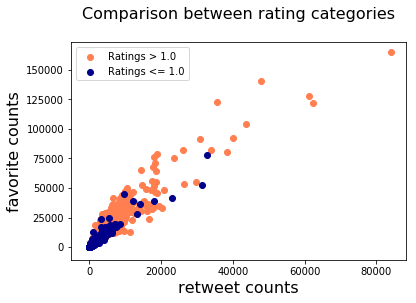

In [119]:
x_rb1 = dogs_rbe1.retweet_count.values
y_rb1 = dogs_rbe1.favorite_count.values
x_ra1 = dogs_rabove1.retweet_count.values
y_ra1 = dogs_rabove1.favorite_count.values
plt.title('Comparison between rating categories\n', fontsize=16)
plt.scatter(x_ra1,y_ra1,color='coral')
plt.scatter(x_rb1,y_rb1,color='darkblue')
plt.ylabel('favorite counts', fontsize=16)
plt.xlabel('retweet counts', fontsize=16)
plt.legend(['Ratings > 1.0','Ratings <= 1.0'])
plt.savefig('plot4b.png',bbox_inches='tight')

By observing the above scatter plots, we see that most of the points that are related to **higher values** for favorite counts and retweet counts belong also to the category $rating\_numerator > rating\_denominator$. 